#Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#Load and Explore the Dataset

In [ ]:
df = pd.read_csv("email_text.csv")
df.head()

,label,text
0,1,do you feel the pressure to perform and not ri...
1,0,hi i've just updated from the gulus and i chec...
2,1,mega authenticv i a g r a discount pricec i a ...
3,1,hey billy it was really fun going out the othe...
4,1,system of the home it will have the capabiliti...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53661 entries, 0 to 53660
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   53661 non-null  int64 
 1   text    53661 non-null  object
dtypes: int64(1), object(1)
memory usage: 838.6+ KB


#Preprocess the Data
Convert the text into numerical features using TF-IDF Vectorization

In [ ]:
#Split dataset into training and test sets
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #test_size = precentage used for testing random_state = shuffling

#Use TF-IDF Vectorizer to convert text data into features
stop_words =stopwords.words('english')
tfidf = TfidfVectorizer(stop_words=stop_words)

#Transform the training and test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)



#Train a Naive Bayes Classifier

Use the Multinomial Naive Bayes Algorithm, which is suitable for text classification tasks

In [ ]:
#Train Naive Bayes Model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

#Evaluate the Model
- Calculate the model's accuracy
- Generate a classification report that includes precision, recall, and F1-Score.
- Plot the confusion matrix to visualize the performance.


Accuracy: 0.9720488213919687
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4711
           1       0.99      0.96      0.97      6022

    accuracy                           0.97     10733
   macro avg       0.97      0.97      0.97     10733
weighted avg       0.97      0.97      0.97     10733



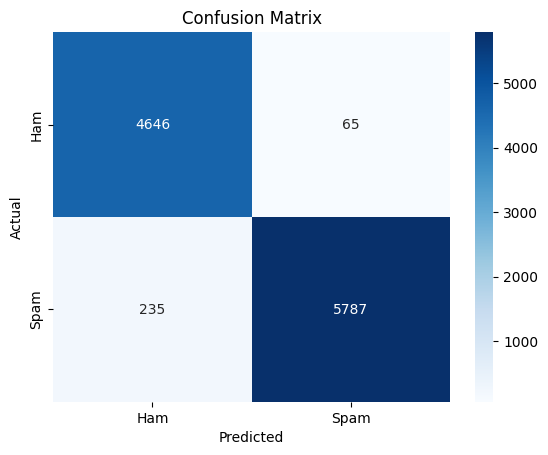

In [ ]:
#Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

#Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Extension: Experiment with other models

Trying Logistic Regression or Support Vector Machines (SVM) for classification. Using n-grams in the TF-IDF vectorization to improve feature extraction. Performing cross-validation to improve model robustness.

In [ ]:
from sklearn.linear_model import LogisticRegression

#Try Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

#Evaluate Logistic Regression
y_pred_lr = lr_model.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")

Logistic Regression Accuracy: 0.9909624522500698
